<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/labs/05-cereal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 5: Cereal Data

## Introduction:


Everyone loves cereal. But have you ever thought deeply about your cereal? Well now is your chance to take a data driven view of your breakfast.

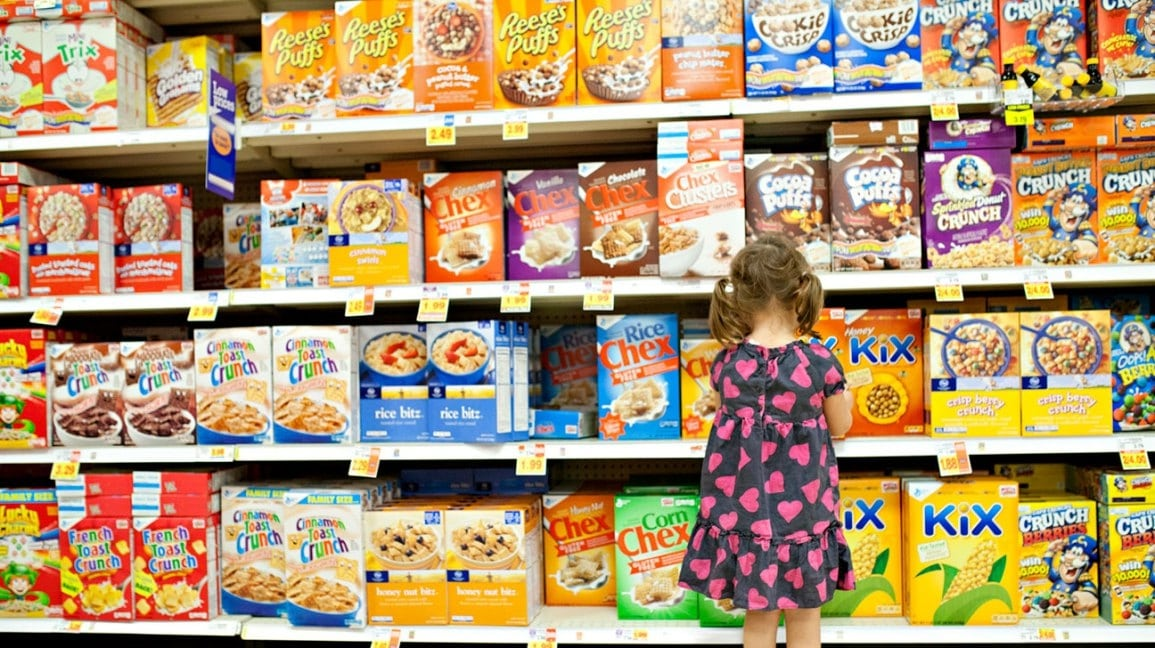


### Getting Started:
Download the data from github. Run the code below to download the data that you'll be using in this lab.

You may use pandas, numpy, matplotlib and/or seaborn for these excercises.

You can use/read their respective documentation in the links below (only if you need too, it's not required for the lab):

*   Seaborn [Documentation]("https://seaborn.pydata.org/tutorial.html")
*   Matplotlib [Documentation]("https://matplotlib.org/stable/api/index.html")
*   Numpy [Documentation]("https://numpy.org/doc/1.23/user/index.html#user")
*   Pandas [Documentation]("https://pandas.pydata.org/docs/user_guide/index.html#user-guide")







In [2]:
import pandas as pd
cereal = pd.read_csv('https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cereal.csv')

## Exercise 1: Protein Powder
Carbs, fats and proteins are the three primary macro nutrients. Create a figure plotting the distribution of each of these macro nutrients together (i.e., three distributions on a single plot). Make sure to provide a legend.

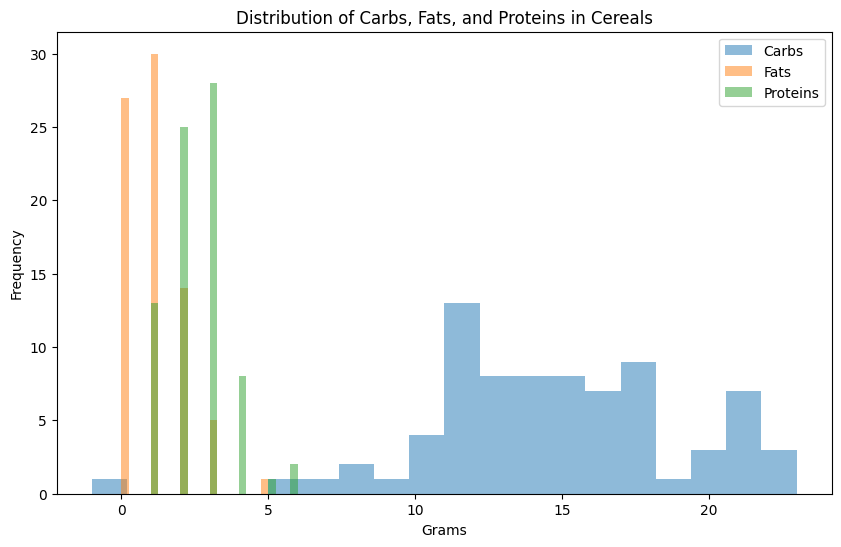

In [3]:
# Enter all of your code for exercise 1 here. Feel free to add more cells if you need to:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(cereal['carbo'], bins=20, alpha=0.5, label='Carbs')
plt.hist(cereal['fat'], bins=20, alpha=0.5, label='Fats')
plt.hist(cereal['protein'], bins=20, alpha=0.5, label='Proteins')
plt.xlabel('Grams')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of Carbs, Fats, and Proteins in Cereals')
plt.show()

## Exercise 2: Sugar Daddy
Get a list of the top 5 most sugary cereals and the 5 least sugary cereals.

In [4]:
# Enter all of your code for exercise 2 here. Feel free to add more cells if you need to:
top_5_sugary = cereal.nlargest(5, 'sugars')[['name', 'sugars']]
print("Top 5:")
print(top_5_sugary)

least_5_sugary = cereal.nsmallest(5, 'sugars')[['name', 'sugars']]
print("\n5 least sugary cereals:")
print(least_5_sugary)

Top 5:
                     name  sugars
30           Golden Crisp      15
66                 Smacks      15
6             Apple Jacks      14
52  Post Nat. Raisin Bran      14
70      Total Raisin Bran      14

5 least sugary cereals:
                         name  sugars
57             Quaker Oatmeal      -1
3   All-Bran with Extra Fiber       0
20     Cream of Wheat (Quick)       0
54                Puffed Rice       0
55               Puffed Wheat       0


## Exercise 3: Cereal Killer
Get a list of the top 5 highest rated and lowest rated cereals.

In [5]:
# Enter all of your code for exercise 3 here. Feel free to add more cells if you need to:
highest_rated = cereal.nlargest(5, 'rating')[['name', 'rating']]
print("Top 5 Rated:")
print(highest_rated)

Top 5 Rated:
                         name     rating
3   All-Bran with Extra Fiber  93.704912
64     Shredded Wheat 'n'Bran  74.472949
65  Shredded Wheat spoon size  72.801787
0                   100% Bran  68.402973
63             Shredded Wheat  68.235885


## Exercise 4: America
Quantify the relationship between sugar and ratings.

Make a plot to visualize this relationship. Superimpose a best fit line (with seaborn) to describe the relationship. It may be helpful to look at the [seaborn regplot documentation]("https://seaborn.pydata.org/generated/seaborn.regplot.html").

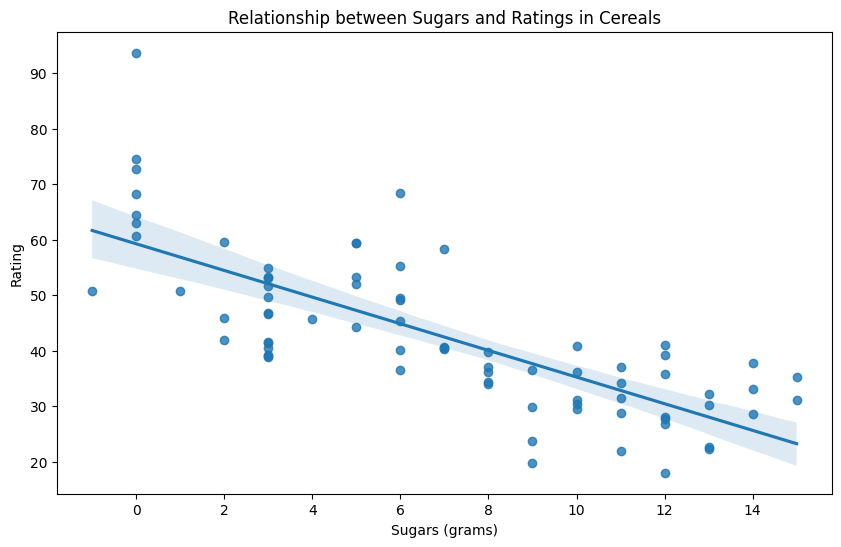

In [6]:
import seaborn as sns

# Make the plot for the data visualization and line of best fit here:
plt.figure(figsize=(10, 6))
sns.regplot(x='sugars', y='rating', data=cereal)
plt.xlabel('Sugars (grams)')
plt.ylabel('Rating')
plt.title('Relationship between Sugars and Ratings in Cereals')
plt.show()


Calculate a correlation statistic describing the relationship between sugar and ratings  (i.e., r or r squared).

In [7]:
# Calculate the statistic using this cell:
correlation = cereal['sugars'].corr(cereal['rating'])
print(correlation)

-0.7596746584301076


Write a statement in plain English interpreting this statistic.

(Write your statement here)

The correllation between sugar and rating is moderate and negative, meaning that as sugar content increases, the rating fo the cereal decreases.

## Exercise 5: America Part 2
Make five plots comparing the relationships of carbo, sugars, calories, protein, and fat with rating.

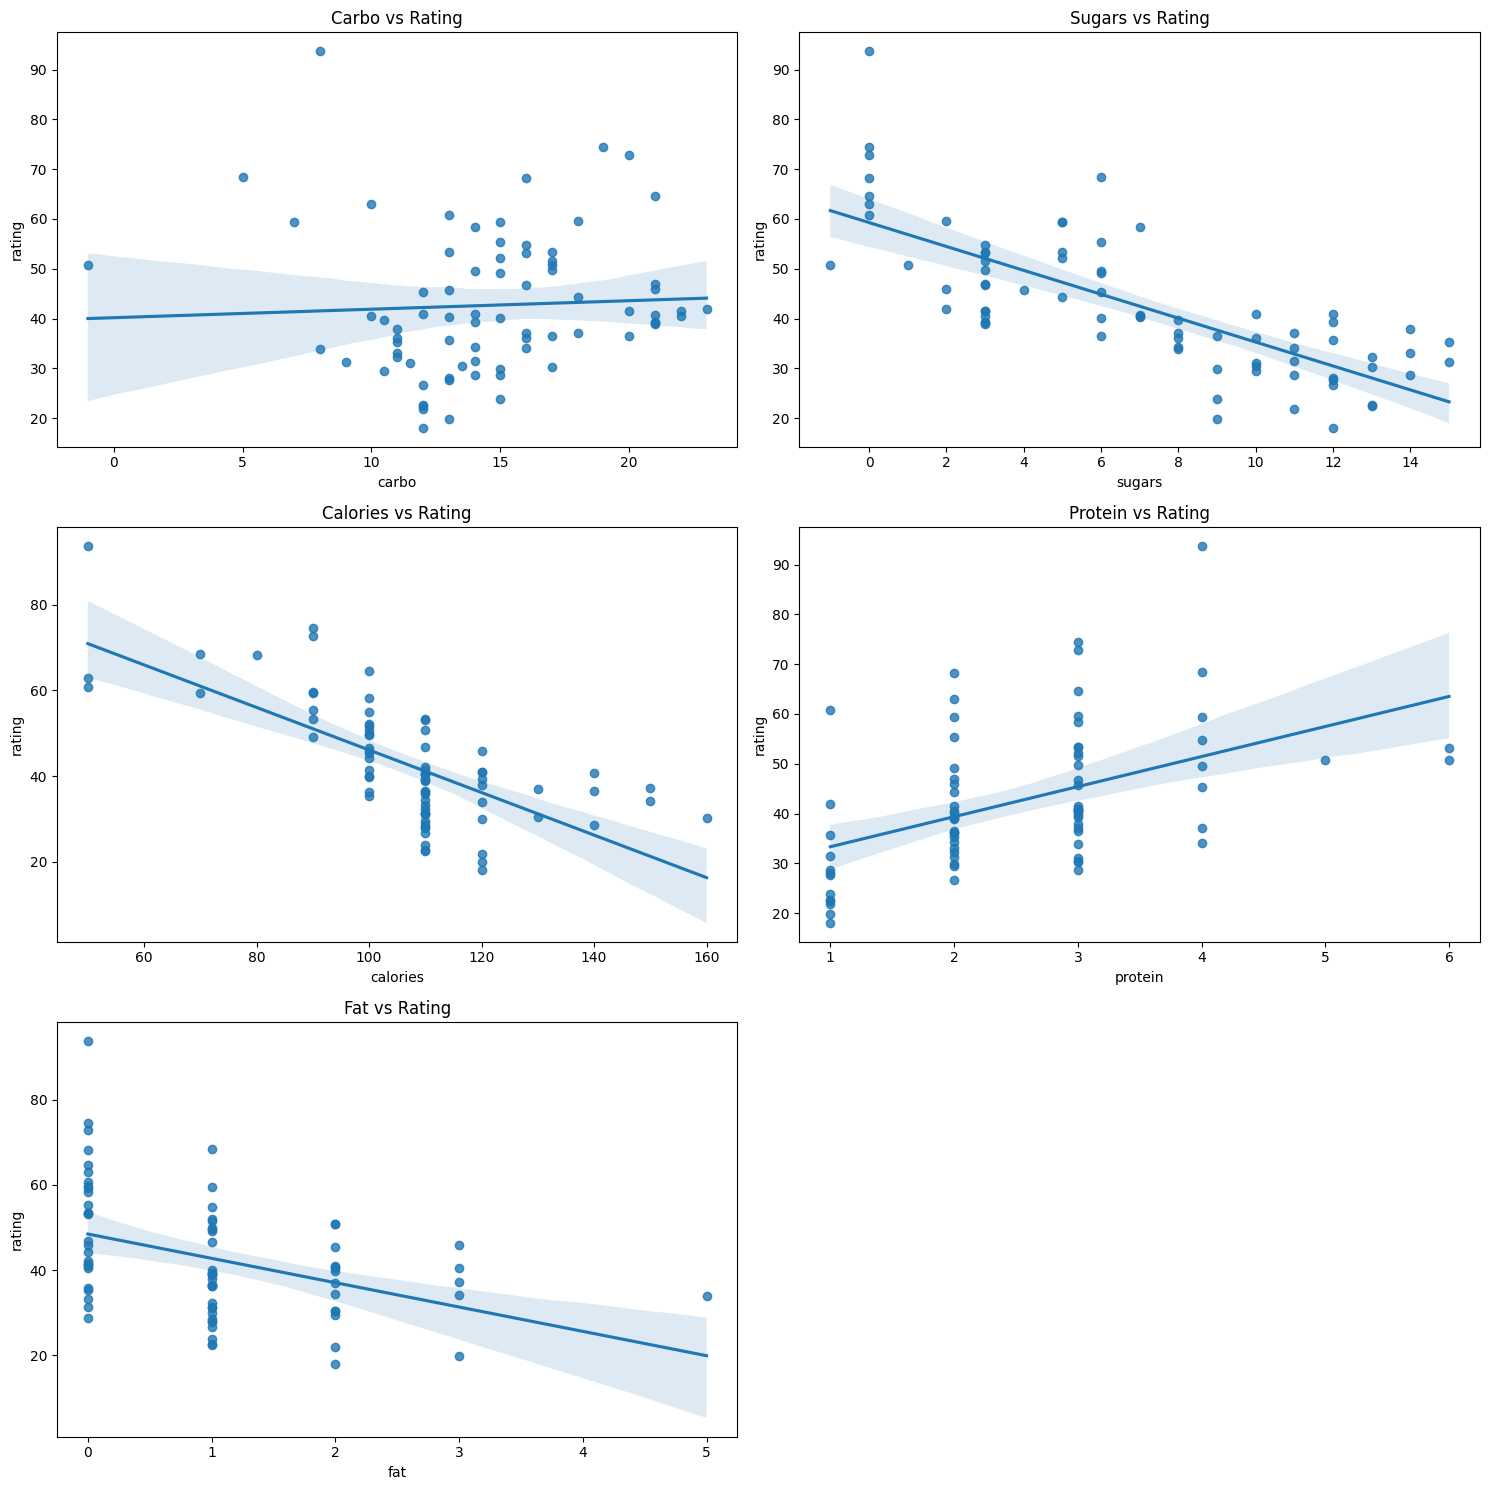

In [8]:
# Write your code to compare the various variables with rating below:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.regplot(x='carbo', y='rating', data=cereal, ax=axs[0, 0])
axs[0, 0].set_title('Carbo vs Rating')

sns.regplot(x='sugars', y='rating', data=cereal, ax=axs[0, 1])
axs[0, 1].set_title('Sugars vs Rating')

sns.regplot(x='calories', y='rating', data=cereal, ax=axs[1, 0])
axs[1, 0].set_title('Calories vs Rating')

sns.regplot(x='protein', y='rating', data=cereal, ax=axs[1, 1])
axs[1, 1].set_title('Protein vs Rating')

sns.regplot(x='fat', y='rating', data=cereal, ax=axs[2, 0])
axs[2, 0].set_title('Fat vs Rating')

fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()

In [9]:
correlation_carbo = cereal['carbo'].corr(cereal['rating'])
correlation_sugars = cereal['sugars'].corr(cereal['rating'])
correlation_calories = cereal['calories'].corr(cereal['rating'])
correlation_protein = cereal['protein'].corr(cereal['rating'])
correlation_fat = cereal['fat'].corr(cereal['rating'])

print("Carbs:", correlation_carbo)
print("Sugars", correlation_sugars)
print("Calories", correlation_calories)
print("Protein", correlation_protein)
print("Fat", correlation_fat)

Carbs: 0.05205466123376461
Sugars -0.7596746584301076
Calories -0.6893760311652586
Protein 0.4706184645492595
Fat -0.40928366014781


Of the variables carbo, sugars, calories, protein, and fat, which has the strongest relationship with rating? Justify your answer.

(Write your statement here)

Sugar has the highest correlation to rating becuase its actual correlation value is closest to -1/1 than all the other correlation values.

## Exercise 6: Preparing for Mt. Everest
Do the same as you did with exercise 5, but instead compare carbo, sugars, protein, and fat with calories.

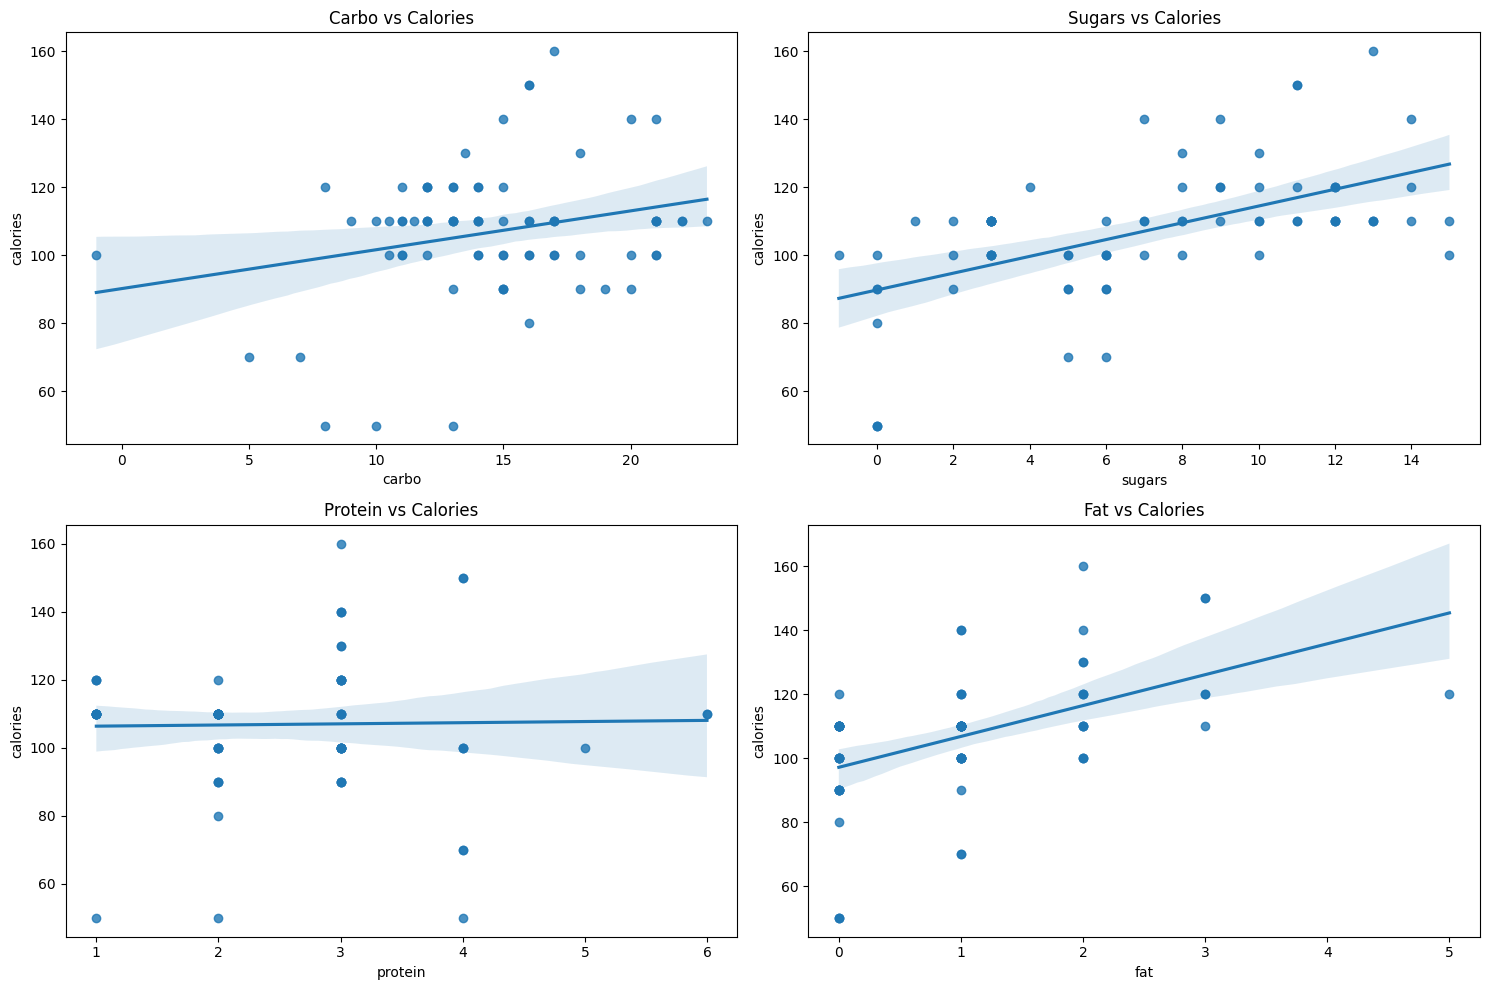

In [10]:
# Write your code to compare the various variables with calories below:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.regplot(x='carbo', y='calories', data=cereal, ax=axs[0, 0])
axs[0, 0].set_title('Carbo vs Calories')

sns.regplot(x='sugars', y='calories', data=cereal, ax=axs[0, 1])
axs[0, 1].set_title('Sugars vs Calories')

sns.regplot(x='protein', y='calories', data=cereal, ax=axs[1, 0])
axs[1, 0].set_title('Protein vs Calories')

sns.regplot(x='fat', y='calories', data=cereal, ax=axs[1, 1])
axs[1, 1].set_title('Fat vs Calories')

plt.tight_layout()
plt.show()

In [11]:
correlation_carbo_calories = cereal['carbo'].corr(cereal['calories'])
correlation_sugars_calories = cereal['sugars'].corr(cereal['calories'])
correlation_protein_calories = cereal['protein'].corr(cereal['calories'])
correlation_fat_calories = cereal['fat'].corr(cereal['calories'])

print("Carbs", correlation_carbo_calories)
print("Sugars", correlation_sugars_calories)
print("Protein:", correlation_protein_calories)
print("Fat:", correlation_fat_calories)

Carbs 0.25068091469892756
Sugars 0.5623402898034883
Protein: 0.019066068232357035
Fat: 0.4986098143003877


Of the variables carbo, sugars, protein, and fat, which has the strongest relationship with calories? Justify your answer.

(Write your statement here)

Sugars has the strongest relationship with calories becuase sugars has the highest correlation value with calories.

## Exercise 7: It’s Hot and It's Cold
The type column has two values: H='hot' and C='cold'. What is the average rating of each type?

In [12]:
# Write your code to get the average rating by type of cereal below:
average_rating_by_type = cereal.groupby('type')['rating'].mean()
print(average_rating_by_type)

type
C    42.095218
H    56.737708
Name: rating, dtype: float64


## Exercise 8: Captain Crunch the Numbers
Provide one additional insight from this dataset that you found interesting. Create at least one figure and explain why the figure was interesting to you.

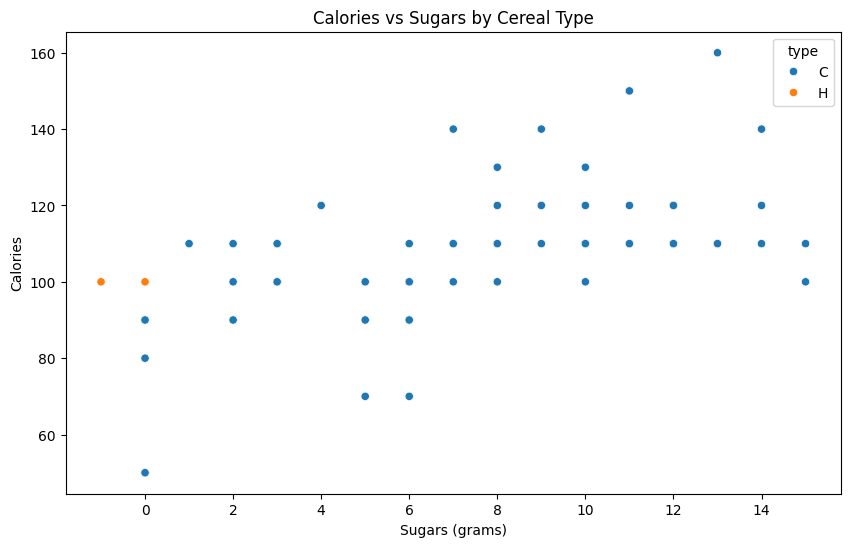

In [13]:
# Create the extra plot below:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sugars', y='calories', hue='type', data=cereal)
plt.xlabel('Sugars (grams)')
plt.ylabel('Calories')
plt.title('Calories vs Sugars by Cereal Type')
plt.show()


(Write why it was interesting here)

I wanted to see to see the difference between Hot and Cold Cereal and sugar content, however, when I made my plot, I realized that the data only has two cereal under the Hot category. I guess this makes sense because most cereal is Cold, but I didn't think it would have only been two. They are also very similiar in terms of calories and sugar.